# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": dt.datetime.strftime(dt.datetime.utcfromtimestamp(city_date), '%m/%d/%y')})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | nyurba
Processing Record 3 of Set 1 | ossora
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | thompson
Processing Record 6 of Set 1 | andselv
City not found. Skipping...
Processing Record 7 of Set 1 | norman wells
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | valle hermoso
Processing Record 10 of Set 1 | bac lieu
Processing Record 11 of Set 1 | phan rang
City not found. Skipping...
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | kijang
Processing Record 14 of Set 1 | manono
Processing Record 15 of Set 1 | kieta
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | jahrom
City not found. Skipping...
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1

Processing Record 33 of Set 4 | juba
Processing Record 34 of Set 4 | urumqi
Processing Record 35 of Set 4 | nouadhibou
Processing Record 36 of Set 4 | ust-kulom
Processing Record 37 of Set 4 | tilichiki
Processing Record 38 of Set 4 | kindu
Processing Record 39 of Set 4 | naryan-mar
Processing Record 40 of Set 4 | hay river
Processing Record 41 of Set 4 | rio verde de mato grosso
Processing Record 42 of Set 4 | ponta do sol
Processing Record 43 of Set 4 | barsovo
Processing Record 44 of Set 4 | pangnirtung
Processing Record 45 of Set 4 | lolua
City not found. Skipping...
Processing Record 46 of Set 4 | kati
Processing Record 47 of Set 4 | dori
Processing Record 48 of Set 4 | smithers
Processing Record 49 of Set 4 | pacifica
Processing Record 0 of Set 5 | dolbeau
City not found. Skipping...
Processing Record 1 of Set 5 | krasnoselkup
Processing Record 2 of Set 5 | saint-joseph
Processing Record 3 of Set 5 | solnechnyy
Processing Record 4 of Set 5 | baiquan
Processing Record 5 of Set 5 |

Processing Record 26 of Set 8 | iqaluit
Processing Record 27 of Set 8 | herat
Processing Record 28 of Set 8 | selishche
Processing Record 29 of Set 8 | mandalgovi
Processing Record 30 of Set 8 | shelburne
Processing Record 31 of Set 8 | mehamn
Processing Record 32 of Set 8 | clyde river
Processing Record 33 of Set 8 | hambantota
Processing Record 34 of Set 8 | hai duong
Processing Record 35 of Set 8 | tobol
Processing Record 36 of Set 8 | viligili
City not found. Skipping...
Processing Record 37 of Set 8 | hangu
Processing Record 38 of Set 8 | marsh harbour
Processing Record 39 of Set 8 | mweka
Processing Record 40 of Set 8 | skibbereen
Processing Record 41 of Set 8 | bolshegrivskoye
City not found. Skipping...
Processing Record 42 of Set 8 | cheuskiny
City not found. Skipping...
Processing Record 43 of Set 8 | crib point
Processing Record 44 of Set 8 | port macquarie
Processing Record 45 of Set 8 | marcona
City not found. Skipping...
Processing Record 46 of Set 8 | hervey bay
Processi

Processing Record 13 of Set 12 | ambilobe
Processing Record 14 of Set 12 | esperance
Processing Record 15 of Set 12 | derzhavinsk
Processing Record 16 of Set 12 | korla
Processing Record 17 of Set 12 | viedma
Processing Record 18 of Set 12 | alanganallur
Processing Record 19 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 20 of Set 12 | rosdorf
Processing Record 21 of Set 12 | acapulco
Processing Record 22 of Set 12 | kutum
Processing Record 23 of Set 12 | williams lake
Processing Record 24 of Set 12 | plettenberg bay
Processing Record 25 of Set 12 | jiujiang
Processing Record 26 of Set 12 | dali
Processing Record 27 of Set 12 | tutoia
Processing Record 28 of Set 12 | boqueirao
Processing Record 29 of Set 12 | pallasovka
Processing Record 30 of Set 12 | adrar
Processing Record 31 of Set 12 | dimona
Processing Record 32 of Set 12 | sabha
Processing Record 33 of Set 12 | sibolga
Processing Record 34 of Set 12 | kaseda
Processing Record 35 of Set 12 | rivadavia
Processin

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()



City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hilo,19.7297,-155.0900,84.27,87,52,1.99,US,06/30/23
1,nyurba,63.2842,118.3319,60.30,63,10,9.73,RU,06/30/23
2,ossora,59.2353,163.0719,57.99,77,14,6.67,RU,06/30/23
3,butaritari,3.0707,172.7902,82.54,78,81,14.23,KI,06/30/23
4,thompson,55.7435,-97.8558,86.16,30,75,9.22,CA,06/30/23


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hilo,19.7297,-155.0900,84.27,87,52,1.99,US,06/30/23
1,nyurba,63.2842,118.3319,60.30,63,10,9.73,RU,06/30/23
2,ossora,59.2353,163.0719,57.99,77,14,6.67,RU,06/30/23
3,butaritari,3.0707,172.7902,82.54,78,81,14.23,KI,06/30/23
4,thompson,55.7435,-97.8558,86.16,30,75,9.22,CA,06/30/23


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

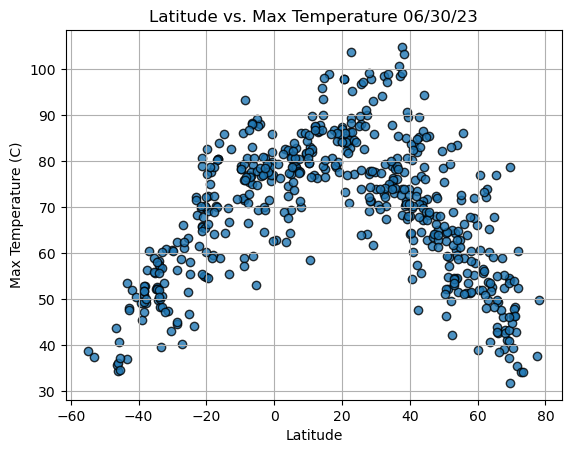

In [28]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df["Lat"]
temp = city_data_df["Max Temp"]


plt.scatter(lat,  
            temp,  
            edgecolor="black", linewidths=1, marker="o",  
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

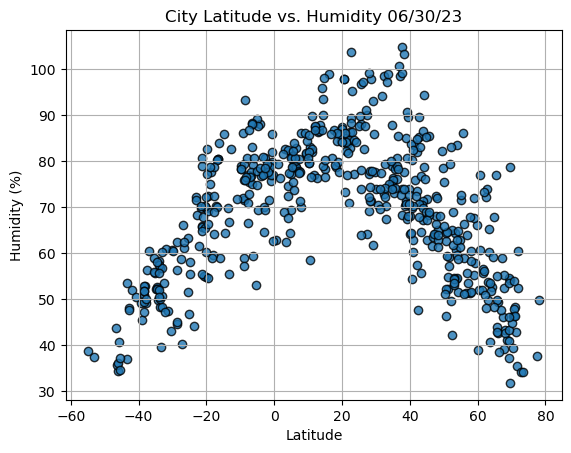

In [27]:
# Build the scatter plots for latitude vs. humidity
lat = city_data_df["Lat"]
humidity = city_data_df["Humidity"]


plt.scatter(lat,  
            temp,  
            edgecolor="black", linewidths=1, marker="o",  
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

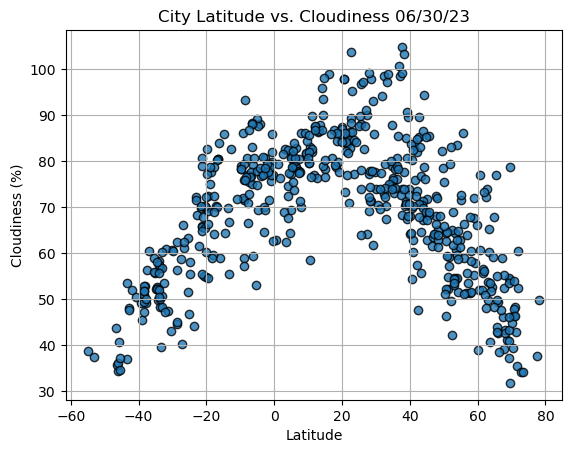

In [26]:
# Build the scatter plots for latitude vs. cloudiness
lat = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]


plt.scatter(lat,  
            temp,  
            edgecolor="black", linewidths=1, marker="o",  
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

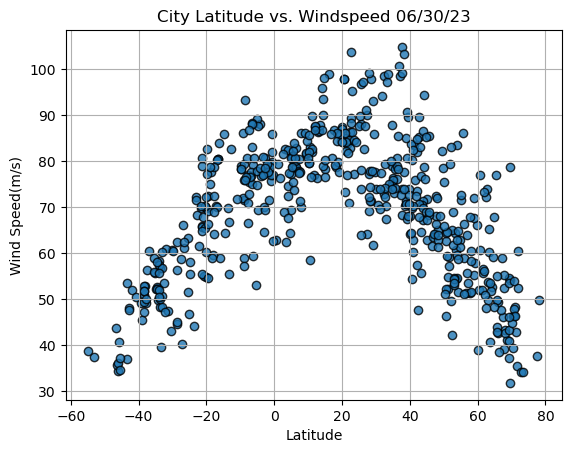

In [11]:
# Build the scatter plots for latitude vs. wind speed
lat = city_data_df["Lat"]
wind_speed = city_data_df["Wind Speed"]


plt.scatter(lat,  
            temp,  
            edgecolor="black", linewidths=1, marker="o",  
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Windspeed "+ time.strftime("%x"))
plt.ylabel("Wind Speed(m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
#Define x_values and y_values
x_values = city_data_df.Lat
y_values = city_data_df['Max Temp']


In [31]:
# Define a function to create Linear Regression plots
def Plot(x_values,y_values,title):

    plt.scatter(x_values,  
                y_values,  
                edgecolor="black", linewidths=1, marker="o",  
                alpha=0.8, label="Cities")

    plt.title(f"Latitude vs. {title} {time.strftime('%x')}")
    plt.ylabel(f"{title}")
    plt.xlabel("Latitude")
    plt.grid(True)
    
    (slope, intercept, rvalue, pvalue, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    plt.plot(x_values,regress_values,"r-")
    
              
    #plt.show()


#def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
(slope, intercept, rvalue, pvalue, std_err) = linregress(x_values, y_values)
    


In [32]:
# Calculate the regression line values.
regress_values = x_values * slope + intercept
print(regress_values)  

City_ID
0      68.945437
1      68.630428
2      68.659712
3      69.065923
4      68.684966
         ...    
549    68.837271
550    68.577058
551    68.861369
552    68.696975
553    68.801459
Name: Lat, Length: 554, dtype: float64


In [33]:
# Create the line equation string.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = -0.01x + 69.09


In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample data

northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hilo,19.7297,-155.0900,84.27,87,52,1.99,US,06/30/23
1,nyurba,63.2842,118.3319,60.30,63,10,9.73,RU,06/30/23
2,ossora,59.2353,163.0719,57.99,77,14,6.67,RU,06/30/23
3,butaritari,3.0707,172.7902,82.54,78,81,14.23,KI,06/30/23
4,thompson,55.7435,-97.8558,86.16,30,75,9.22,CA,06/30/23


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
10,manono,-7.3000,27.4167,75.42,30,35,3.98,CD,06/30/23
11,kieta,-6.2167,155.6333,79.16,85,40,7.31,PG,06/30/23
12,hermanus,-34.4187,19.2345,49.80,84,4,7.85,ZA,06/30/23
13,rikitea,-23.1203,-134.9692,72.19,62,71,21.41,PF,06/30/23
14,mataura,-46.1927,168.8643,34.48,96,97,6.06,NZ,06/30/23


###  Temperature vs. Latitude Linear Regression Plot

-0.7010661906591635


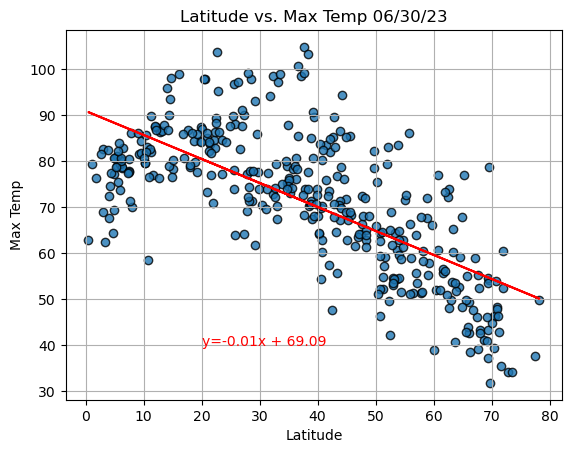

In [36]:
# Linear regression on Northern Hemisphere
plt.annotate(f"y={slope:.2f}x + {intercept:.2f}",(20,40), color='red')
Plot(northern_hemi_df.Lat,northern_hemi_df['Max Temp'], "Max Temp")

# Calculate and print the r value
r_value = x_values.corr(northern_hemi_df['Max Temp'])
print(r_value)

# Save the figure
plt.savefig("output_data/Fig5.png")

# Show plot
plt.show()


0.8285040507282496


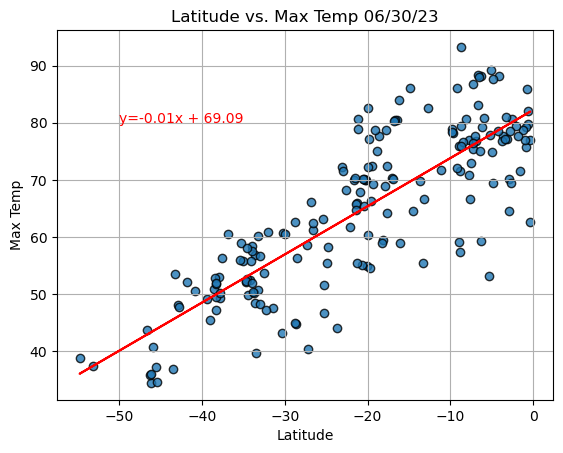

In [37]:
# Linear regression on Southern Hemisphere
plt.annotate(f"y={slope:.2f}x + {intercept:.2f}",(-50,80), color='red')
Plot(southern_hemi_df.Lat,southern_hemi_df['Max Temp'], "Max Temp")

# Calculate and print the r value
r_value = x_values.corr(southern_hemi_df['Max Temp'])
print(r_value)

# Save the figure
plt.savefig("output_data/Fig6.png")

# Show plot
plt.show()


**Discussion about the linear relationship:

**Northern Hemisphere

Analysis shows that as latitude increases, temperature decreases moderatley.
With the r-value being -0.70, this suggests may be a negative correlation between northern hemisphere latitudes and temperatures.

**Southern Hemisphere

Analysis shows that as latitude decreases, temperature increases signficantly.
With the r-value being 0.82, this indicates a strong positive correlation between southern hemisphere latitudes and temperatures.


Overall, cities closer to the equator experience higher temperatures. The correlation between latitudes and temperatures is more signficant for southern hemispheres.

### Humidity vs. Latitude Linear Regression Plot

0.0012964781650720836


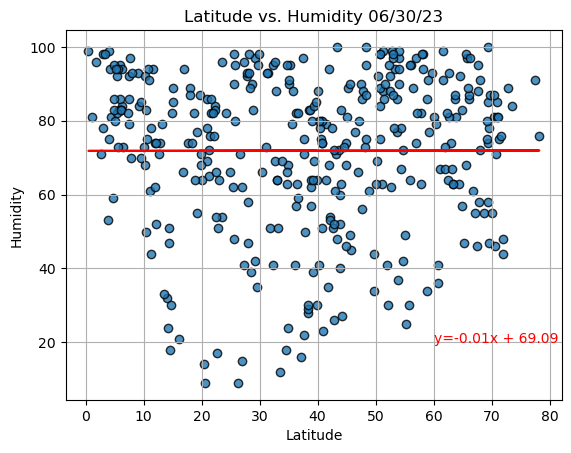

In [38]:
# Linear regression on Northern Hemisphere
plt.annotate(f"y={slope:.2f}x + {intercept:.2f}",(60,20), color='red')
Plot(northern_hemi_df.Lat,northern_hemi_df["Humidity"], "Humidity")

# Calculate and print the r value
r_value = x_values.corr(northern_hemi_df["Humidity"])
print(r_value)

# Save the figure
plt.savefig("output_data/Fig7.png")

# Show plot
plt.show()


-0.003706326471154727


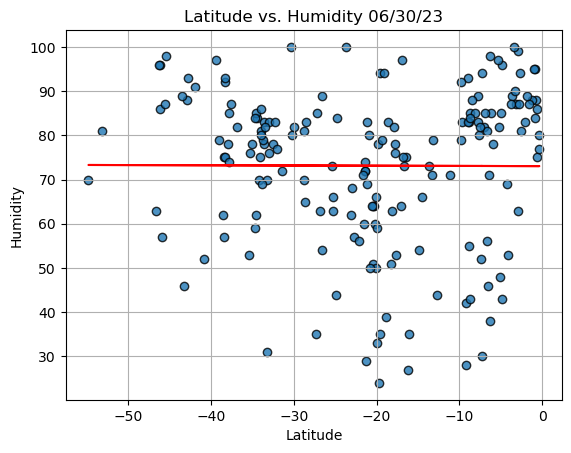

In [39]:
# Linear regression on Southern Hemisphere
plt.annotate(f"y={slope:.2f}x + {intercept:.2f}",(-50,20), color='red')
Plot(southern_hemi_df.Lat,southern_hemi_df["Humidity"], "Humidity")

# Calculate and print the r value
r_value = x_values.corr(southern_hemi_df["Humidity"])
print(r_value)

# Save the figure
plt.savefig("output_data/Fig8.png")

# Show plot
plt.show()



**Discussion about the linear relationship:

For both northern and southern hemisphere cities there is no statistical correlation between latitude and humidity levels.

### Cloudiness vs. Latitude Linear Regression Plot

-0.1167838840252163


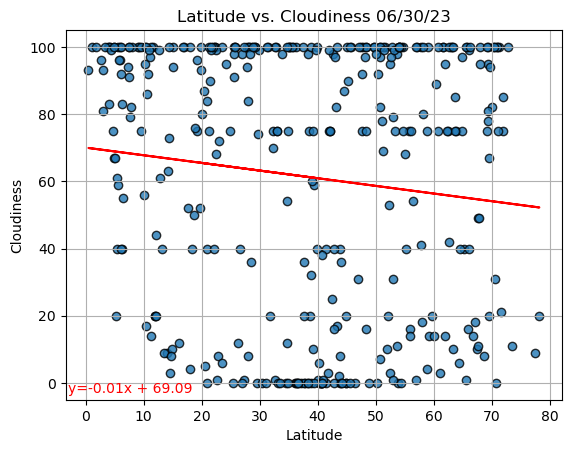

In [40]:
# Northern Hemisphere
plt.annotate(f"y={slope:.2f}x + {intercept:.2f}",(-3,-3), color='red')
Plot(northern_hemi_df.Lat,northern_hemi_df["Cloudiness"], "Cloudiness")

# Calculate and print the r value
r_value = x_values.corr(northern_hemi_df["Cloudiness"])
print(r_value)

# Save the figure
plt.savefig("output_data/Fig9.png")

# Show plot
plt.show()


-0.13971111607449072


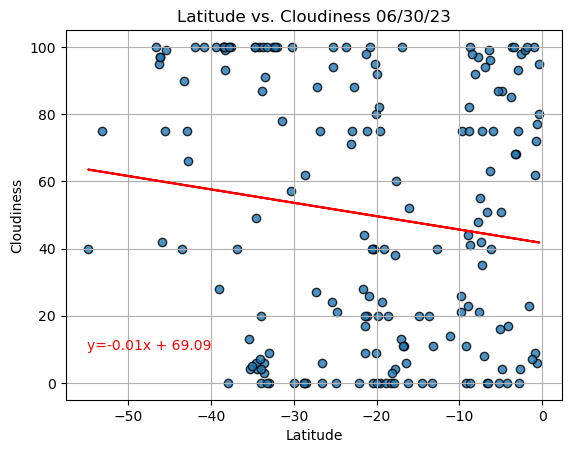

In [41]:
# Southern Hemisphere
plt.annotate(f"y={slope:.2f}x + {intercept:.2f}",(-55,10), color='red')
Plot(southern_hemi_df.Lat,southern_hemi_df["Cloudiness"], "Cloudiness")

# Calculate and print the r value
r_value = x_values.corr(southern_hemi_df["Cloudiness"])
print(r_value)

# Save the figure
plt.savefig("output_data/Fig10.png")

# Show plot
plt.show()


**Discussion about the linear relationship:** 

For both northern and southern hemisphere cities there is no statistical correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

-0.10413513603296956


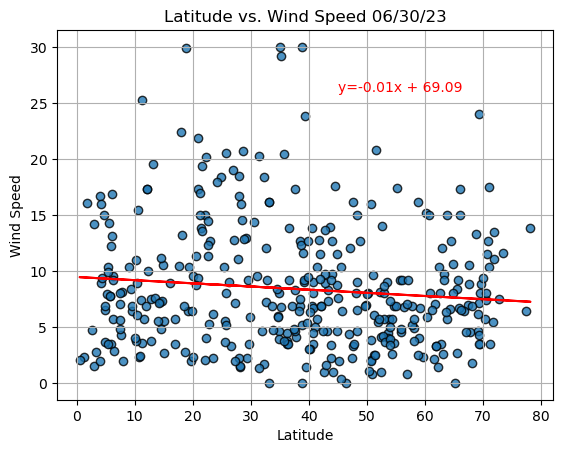

In [42]:
# Northern Hemisphere
plt.annotate(f"y={slope:.2f}x + {intercept:.2f}",(45,26), color='red')
Plot(northern_hemi_df.Lat,northern_hemi_df["Wind Speed"], "Wind Speed")

# Calculate and print the r value
r_value = x_values.corr(northern_hemi_df["Wind Speed"])
print(r_value)

# Save the figure
plt.savefig("output_data/Fig11.png")

# Show plot
plt.show()


-0.0725700120815812


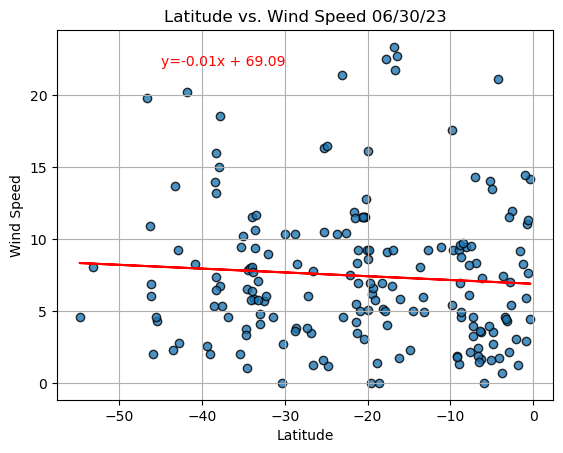

In [43]:
# Southern Hemisphere
plt.annotate(f"y={slope:.2f}x + {intercept:.2f}",(-45,22), color='red')
Plot(southern_hemi_df.Lat,southern_hemi_df["Wind Speed"], "Wind Speed")

# Calculate and print the r value
r_value = x_values.corr(southern_hemi_df["Wind Speed"])
print(r_value)

# Save the figure
plt.savefig("output_data/Fig12.png")

# Show plot
plt.show()


**Discussion about the linear relationship:** 

For both northern and southern hemisphere cities there is no statistical correlation between latitude and wind speeds.